# Select relevant extracted wikidump files

In [1]:
import re
import pandas as pd
import os
import time
from tqdm.notebook import tqdm
import unidecode
import matplotlib.pyplot as plt
%matplotlib inline

# import from script
from preprocessing_functions import *

## Load Data

In [2]:
# load articles from dump
language = "en" # 'en' for english; 'fr' for french
indir = f"/Volumes/NIJMAN/THESIS/{language}wiki_extracted" # path/to/wikidump/extracted

In [4]:
dir_list = os.listdir(indir)
dir_list

['ms8',
 'ms6',
 '.DS_Store',
 '._.DS_Store',
 'ms1',
 'ms7',
 'ms9',
 'ms2',
 'ms5',
 'ms4',
 'ms3',
 'ms10',
 'ms11',
 'ms12',
 'ms15',
 'ms13',
 'ms14',
 '._ms15',
 'ms16',
 '._ms16',
 'ms17',
 '._ms17',
 'ms18',
 '._ms18',
 'ms19',
 '._ms19',
 'ms20',
 '._ms20',
 'ms22',
 'ms23',
 'ms24',
 'ms25',
 'ms21',
 'ms26',
 'ms27',
 'ms28',
 'ms29',
 'ms30',
 'ms31',
 'ms32',
 'ms33',
 'ms34',
 'ms35',
 'ms36',
 'ms37',
 'ms38',
 'ms39',
 'ms40',
 'ms41',
 'ms42',
 'ms43',
 'ms44',
 'ms45',
 'ms46',
 'ms47',
 'ms48',
 'ms49',
 'ms50',
 'ms51',
 'ms52',
 'ms53',
 'ms54',
 'ms55',
 'ms56',
 'ms57',
 'ms58',
 'ms59',
 'ms60',
 'ms61',
 'ms62']

In [3]:
wikidump = read_stream(indir)

It took 51.44147300720215s to read /Volumes/NIJMAN/THESIS/frwiki_extracted.


In [4]:
len(wikidump)

# enwiki length 16498
# frwiki length 5384

5384

## City List

In [5]:
# load cities csv
fp = '../input/List_of_cities_300k.csv' # path to csv with city information
cities = pd.read_csv(fp, sep=';')
name_col = f'Mua_{language}' #column with citynames

# split combined citynames 
cities_ls = [unidecode.unidecode(city_component) 
             for city in cities[name_col] 
             for city_component in city.split('-')]

In [6]:
print(cities_ls)

['Paris', 'Londres', 'Madrid', 'Berlin', 'Milan', 'Barcelone', 'Athenes', 'Rome', 'Birmingham', 'Lisbonne', 'Naples', 'Katowice', 'Manchester', 'Hambourg', 'Budapest', 'Bucarest', 'Varsovie', 'Stuttgart', 'Vienne', 'Munich', 'Bruxelles', 'Stockholm', 'Francfort', 'Cologne', 'Copenhague', 'Valence', 'Turin', 'Glasgow', 'Prague', 'Lyon', 'Sofia', 'Liverpool', 'Porto', 'Seville', 'Dublin', 'Helsinki', 'Amsterdam', 'Rotterdam', 'Dusseldorf', 'Essen', 'Oberhausen', 'Lille', 'Lodz', 'Marseille', 'Anvers', 'Bilbao', 'Newcastle', 'Cracovie', 'Bochum', 'Herne', 'Thessalonique', 'Nuremberg', 'Riga', 'Duisbourg', 'Dortmund', 'Hanovre', 'Zurich', 'Oslo', 'Breme', 'Dresde', 'Sheffield', 'Palerme', 'Poznan', 'Gelsenkirchen', 'Bottrop', 'Bordeaux', 'Wroclaw', 'Goteborg', 'Gothembourg', 'Saragosse', 'Genes', 'Catane', 'La Haye', 'Toulouse', 'Bristol', 'Vilnius', 'Sarrebruck', 'Malaga', 'Nantes', 'Leeds', 'Nottingham', 'Florence', 'Gdansk', 'Leipzig', 'Mannheim', 'Belfast', 'Portsmouth', 'Venise', 'Edi

***

## Fr Dump

In [15]:
frwikidump = split_dump(wikidump)
len(frwikidump)

Progress:   0%|          | 0/5384 [00:00<?, ?it/s]

4045588

In [16]:
p_frwikidump = process_dump2(frwikidump, cities_ls)

Progress:   0%|          | 0/4045588 [00:23<?, ?it/s]

After processing 274745 articles remain, that is 6.79% of the total number of articles (4045588) in this dump.


In [18]:
df = pd.DataFrame(p_frwikidump, columns = ['article_id', 'title', 'text'])
outputfp = '../../../data/frwikidump_complete.csv'
df.to_csv(outputfp, index = False)

<AxesSubplot:ylabel='Frequency'>

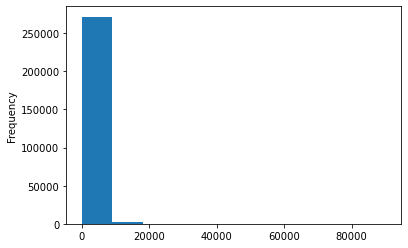

In [19]:
df['length'] = [len(text.split()) for text in df.text]

df['length'].plot.hist()

In [20]:
df.sort_values('length', ascending=True).head(20)

,article_id,title,text,length
190331,8335484,Paris-Nice-Rome,\nParis-Nice-Rome\n\n\n\n,1
150163,5625176,Bordeaux-Grenoble,\nBordeaux-Grenoble\n\n\n\n,1
254532,13456161,Paris-Lyon-Mediterranee,\nParis-Lyon-Mediterranee\n\n\n\n,1
158114,6083427,Nice-Genes,\nNice-Genes\n\n\n\n,1
87640,2155965,Paris-Madrid,\nParis-Madrid\n\n\n\n,1
127635,4550071,Liege-Rome-Liege,\nLiege-Rome-Liege\n\n\n\n,1
178274,7375911,Paris-Bruxelles,\nParis-Bruxelles\n\n\n\n,1
116694,3934340,Lyon-Turin,\nLyon-Turin\n\n\n\n,1
90660,2518914,Athenes-Helsinki,\nAthenes-Helsinki\n\n\n\n,1
84428,1923454,Ligne Paris-Toulouse,\nLigne Paris-Toulouse\n\n\n\n,2


In [22]:
df.text[124801]

'\nTGV Paris-Lille\n\n\n\n'

In [28]:
# df['length_title'] = [len(title.split()) for title in df.title]
df[df.length == df.length_title] # think this should be cover the empty referral pages

,article_id,title,text,length,length_title
11920,131797,Gare de Lyon (Paris),\nGare de Lyon (Paris)\n\n\n\n,4,4
26533,329463,Bordeaux - Milan AC (1996),\nBordeaux - Milan AC (1996)\n\n\n\n,5,5
26534,329470,Liverpool - Milan AC (2005),\nLiverpool - Milan AC (2005)\n\n\n\n,5,5
37623,504102,Districts de Stockholm et de Goteborg,\nDistricts de Stockholm et de Goteborg\n\n\n\n,6,6
39332,536800,Charleroi Bruxelles-Sud,\nCharleroi Bruxelles-Sud\n\n\n\n,2,2
...,...,...,...,...,...
271601,14601337,Heures de Turin-Milan,\nHeures de Turin-Milan\n\n\n\n,3,3
271650,14604820,Heures de Milan-Turin,\nHeures de Milan-Turin\n\n\n\n,3,3
272422,14658402,Rome Paris Films,\nRome Paris Films\n\n\n\n,3,3
273381,14824491,Porte de Berlin (Szczecin),\nPorte de Berlin (Szczecin)\n\n\n\n,4,4


## En Dump 1

In [16]:
# extract articles from first half of dump
wikidump1 = split_dump(wikidump[:round(len(wikidump)/2)])

Progress:   0%|          | 0/8249 [00:00<?, ?it/s]

In [17]:
wikilength1 = len(wikidump1) #5090764
print(wikilength1)

5090764


In [20]:
p_wikidump1 = process_dump2(wikidump1, cities_ls)

Progress:   0%|          | 0/5090764 [00:00<?, ?it/s]

After processing 232261 articles remain, that is 4.56% of the total number of articles (5090764) in this dump.


In [17]:
p_wikilength1 = len(p_wikidump1) #232260

print(p_wikilength1)

232260


In [23]:
# save to .csv
df = pd.DataFrame(p_wikidump1, columns = ['article_id', 'title', 'text'])
outputfp = '../../../data/enwikidump_1.csv'
df.to_csv(outputfp, index = False)

In [ ]:
df['length'] = [len(text.split()) for text in df.text]

df['length'].plot.hist()

In [ ]:
df.sort_values('length', ascending=True).head(20)

## En Dump2

In [15]:
# extract articles from second half of dump
wikidump2 = split_dump(wikidump[round(len(wikidump)/2):])

Progress:   0%|          | 0/8249 [00:00<?, ?it/s]

In [16]:
wikilength2 = len(wikidump2) # 11305922
# wikilength2 = nr that it should be

print(wikilength2)

11305922


In [17]:
wikilength1 = 5090764 #len(wikidump1)
wikilength2 = 11305922 #len(wikidump2)
wikilength = wikilength1 + wikilength2 #16396686

print(f"nr of articles in the enwiki dump is {wikilength}.")

nr of articles in the enwiki dump is 16396686.


In [18]:
p_wikidump2 = process_dump2(wikidump2, cities_ls)

Progress:   0%|          | 0/11305922 [00:57<?, ?it/s]

After processing 277634 articles remain, that is 2.46% of the total number of articles (11305922) in this dump.


In [22]:
p_wikilength2 = len(p_wikidump2) # 277634
# p_wikilength2 = 'nr that should actually go here'
print(p_wikilength2)

277634


In [23]:
p_wikilength1 = 232260
p_wikilength2 = 277634

p_wikilength = p_wikilength1 + p_wikilength2 # 509894
print(p_wikilength)

509894


In [24]:
# save to .csv
df = pd.DataFrame(p_wikidump2, columns = ['article_id', 'title', 'text'])
outputfp = f'../../../data/enwikidump_2.csv'
df.to_csv(outputfp, index = False)

In [25]:
print(
    f"After processing {p_wikilength} articles remain, " 
    f"that is {round(((p_wikilength/wikilength)*100), 2)}% "
    f"of the total number of articles ({wikilength}) in this dump."
)

After processing 509894 articles remain, that is 3.11% of the total number of articles (16396686) in this dump.


<AxesSubplot:ylabel='Frequency'>

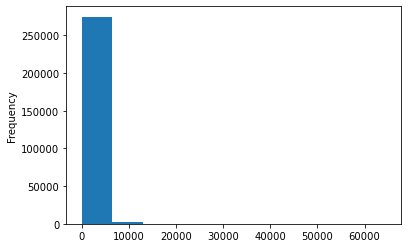

In [25]:
df['length'] = [len(text.split()) for text in df.text]

df['length'].plot.hist()

In [31]:
df.sort_values('length', ascending=True).head(1000)

,article_id,title,text,length
209078,55896674,Paris-Gare-de-Lyon,\nParis-Gare-de-Lyon\n\n\n\n,1
259952,66489250,Rome-Berlin-Tokyo,\nRome-Berlin-Tokyo\n\n\n\n,1
252284,64797958,Gdansk-Gdynia-Sopot,\nGdansk-Gdynia-Sopot\n\n\n\n,1
245703,63558110,Nice-Genoa,\nNice-Genoa\n\n\n\n,1
265662,67713650,Liege-Sofia-Liege,\nLiege-Sofia-Liege\n\n\n\n,1
...,...,...,...,...
186332,51189286,FC Barcelona 1-1 Atletico Madrid (May 2014),\nFC Barcelona 1-1 Atletico Madrid (May 2014)\...,7
137839,41600041,"Bois de Boulogne (Porte de Madrid, Paris)","\nBois de Boulogne (Porte de Madrid, Paris)\n\...",7
213469,56774776,"Church of Saint Anthony of Padua, Turin","\nChurch of Saint Anthony of Padua, Turin\n\n\n\n",7
134536,40999984,"London, Bristol and South Wales Direct Railway","\nLondon, Bristol and South Wales Direct Railw...",7


***